In [6]:
from infrastructure.classes import Experiment, TrainParameters
from utils.plot import plot_quantile_levels_from_dataset
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="picnn_fnlvqr_banana",
    dataset_number_of_points=10**4,
    dataset_parameters=dict(number_of_features=10, number_of_classes=2),
    dataloader_parameters=dict(batch_size=124, shuffle=True),
    pushforward_operator_name="entropic_neural_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        epsilon=1e-3,
        amount_of_samples_to_estimate_psi=512,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0),
        warmup_iterations=30
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 89, Objective: 1.462, LR: 0.000322:  88%|████████▊ | 88/100 [09:13<01:15,  6.29s/it]


KeyboardInterrupt: 

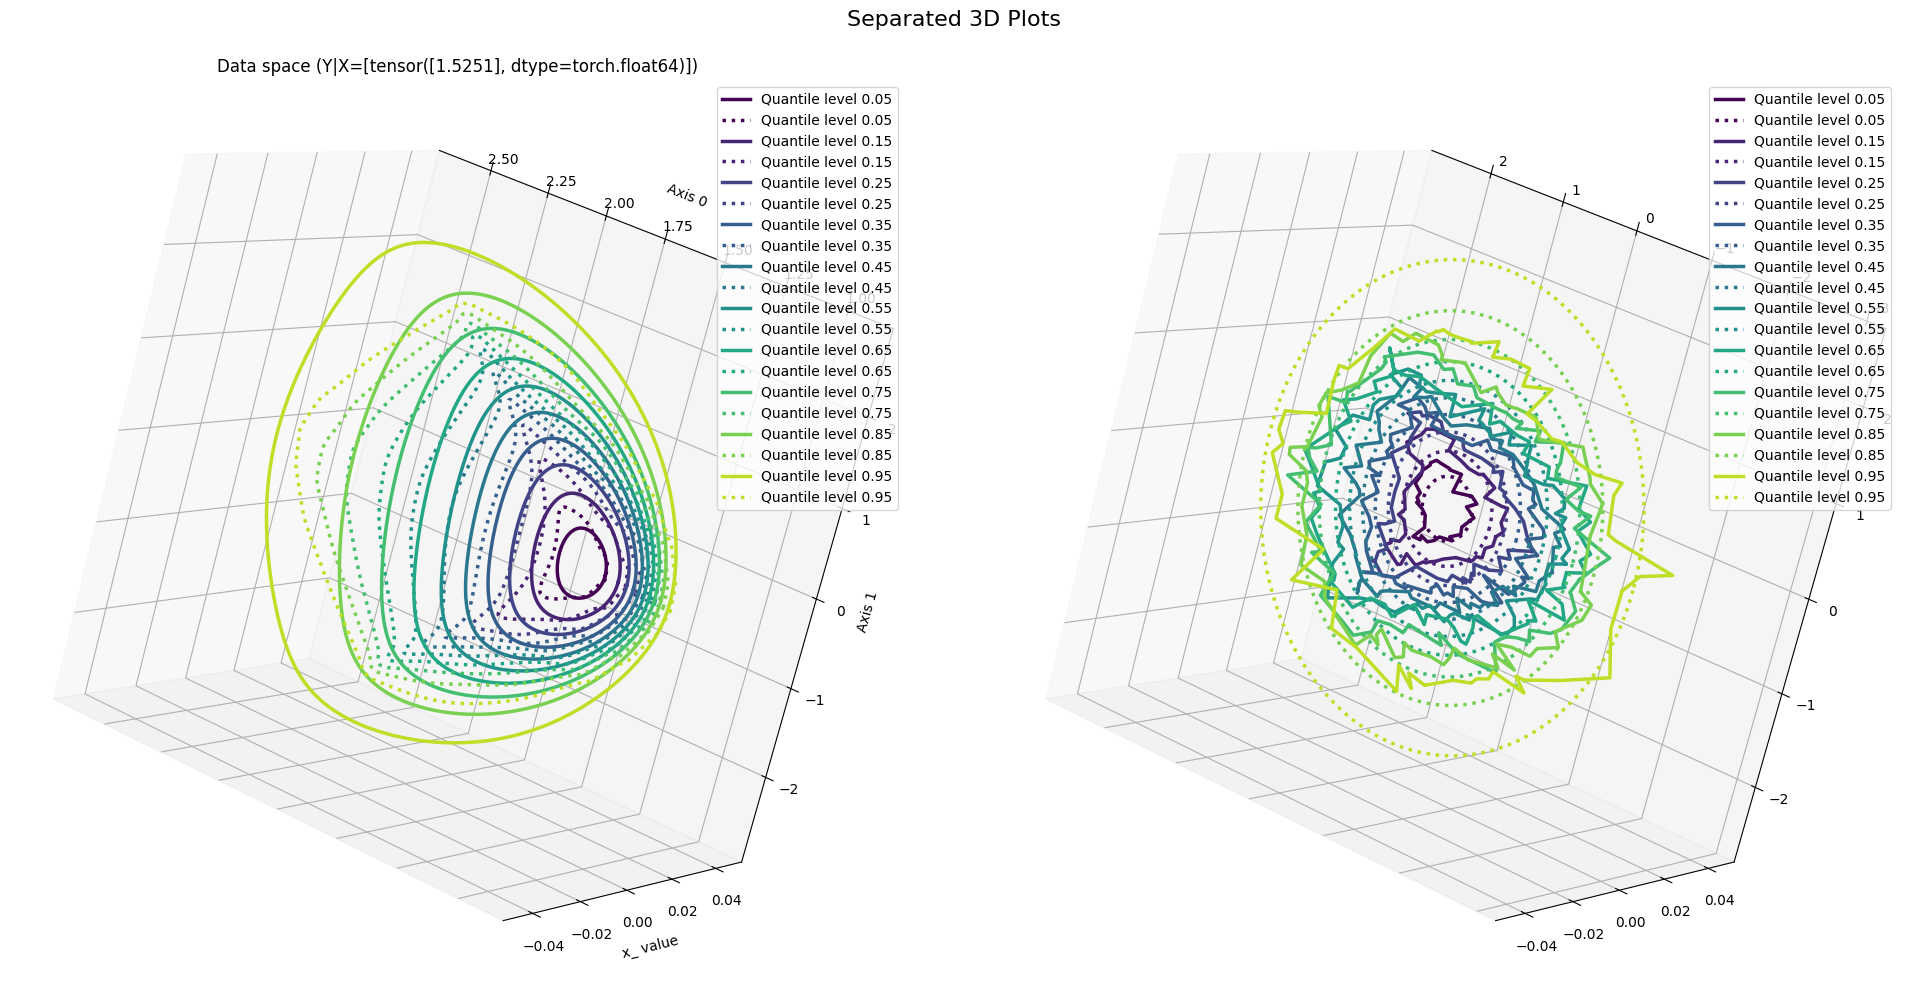

In [4]:
%matplotlib inline
from datasets import PICNN_FNLVQR_Banana

dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=dataset.sample_covariates(1),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)